# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [2]:
def num_nans(df):
    empty = df.isna()
    return empty.any(axis=1).sum()


print("there are " +  str(num_nans(df)) + " rows with at least one empty value")
df.head()

there are 708 rows with at least one empty value


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [3]:
def drop_na(df):
    # isna() to make everything into boolean values
    is_nan = df.isna()
    
    # Use the sum method to count the number of NaN values in each column.
    nan_counts = is_nan.sum()
    
    # Filter columns where the count of NaN values is less than or equal to the threshold.
    filtered_columns = nan_counts[nan_counts <= 200].index
    
    # Create a new DataFrame with only the filtered columns.
    filtered = df[filtered_columns]
    return filtered
    

dfc = pd.read_csv("train.csv")

dfc = drop_na(dfc)
dfc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [4]:
def to_numerical(df):
    replacement_dict = {"male": 0, "female": 1}
    
    # Apply the replacement to the entire DataFrame.
    df.replace(replacement_dict, inplace=True)
    return df

dfd = pd.read_csv("train.csv")

dfd = to_numerical(dfd)
dfd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    names = df['Name'].tolist()
    
    middle_names = []
    first_names = []
    last_names = []
    titles = []
    possible_titles = ['Mr','Mrs','Master','Miss','Dr']
    # Extract components 
    for full_name in names:
        name = full_name.split()
        last = name[0].strip(',')
        title = name[1].strip('.')
        first = name[2]
        
        if len(name)>3:
            middle = name[3]
            middle_names.append(middle)
        else:
            middle_names.append("")
        
        first_names.append(first)
        last_names.append(last)
        if title in possible_titles:
            titles.append(title)
        else:
            titles.append("")
        
    data = {'First Name' :first_names, 'Middle Name': middle_names, 'Last Name': last_names, 'Title': titles}
    output = pd.DataFrame(data) 
    return output

dfe = pd.read_csv("train.csv")
dfe[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
dfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [6]:
def replace_with_mean(df):
    average_age = df['Age'].mean()

    return df['Age'].fillna(average_age)


dff = pd.read_csv("train.csv")

dff['Age'] = replace_with_mean(dfd)
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

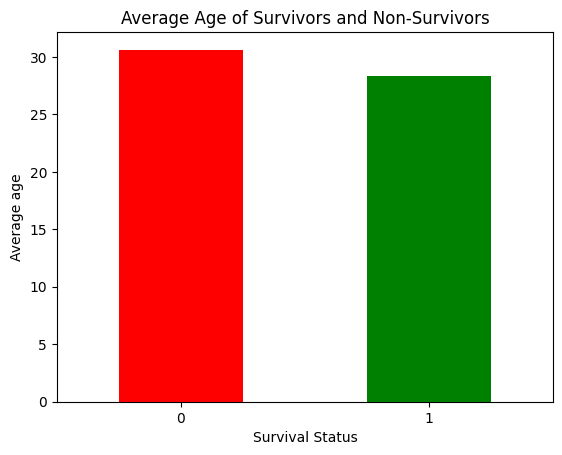

In [7]:
import matplotlib as plot

dfg = pd.read_csv("train.csv")

average_age_by_survival = dfg.groupby('Survived')['Age'].mean()

average_age_by_survival.plot.bar(x="Survived", y="Age",color=['red', 'green'], rot=0, xlabel = 'Survival Status' ,ylabel = 'Average age',title="Average Age of Survivors and Non-Survivors");

observation: the average age of the passengers who survived the disaster is slightly lower than the average age of those who did not survive. This suggests that younger passengers may have had a higher chance of survival. However, the difference in the average ages is relatively small and may not be statistically significant. 

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

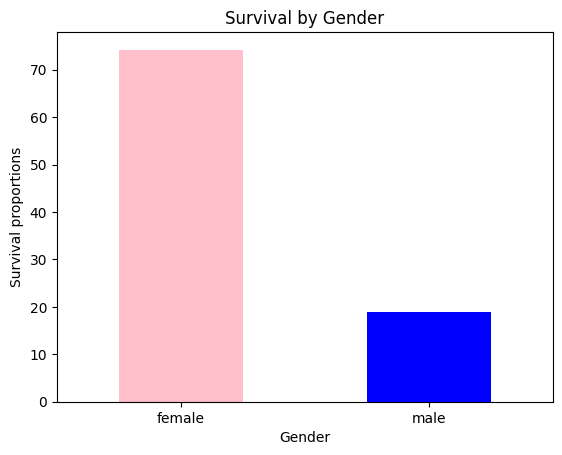

In [34]:
import matplotlib as plot
dfh = pd.read_csv("train.csv")

average = dfh.groupby('Sex')['Survived'].mean()*100

average.plot.bar(x="Sex", y="Survived",color=['pink', 'blue'], rot=0, xlabel = 'Gender' ,ylabel = 'Survival proportions',title="Survival by Gender");

Female survival rate seems to be much higher than male survival rate

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

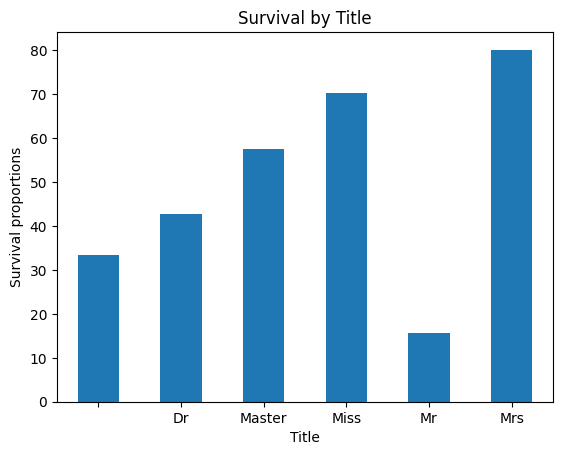

In [9]:
import matplotlib as plot

dfi = pd.read_csv("train.csv")
dfi = extract_names(dfi)
dfi.insert(1,'Survived', dfh['Survived'])
average = dfi.groupby('Title')['Survived'].mean()*100
#data = {"something":["Survive", "Did not survive"], "else" : [average_age_by_survival[0] ,average_age_by_survival[1]]}


average.plot.bar(x="Title", y="Survived", rot=0, xlabel = 'Title' ,ylabel = 'Survival proportions',title="Survival by Title");

the highest proportion of survivors is among passengers with 'Mrs' and 'Miss' titles, which are likely to correspond to female passengers. On the other hand, the lowest proportion of survivors is among passengers with 'Rev' and 'Mr' titles, which are likely to correspond to male passengers.

This is consistent with the historical accounts of the Titanic disaster, as the "women and children first" policy was observed during the evacuation of the Titanic, which prioritized the safety of women and children over adult men.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

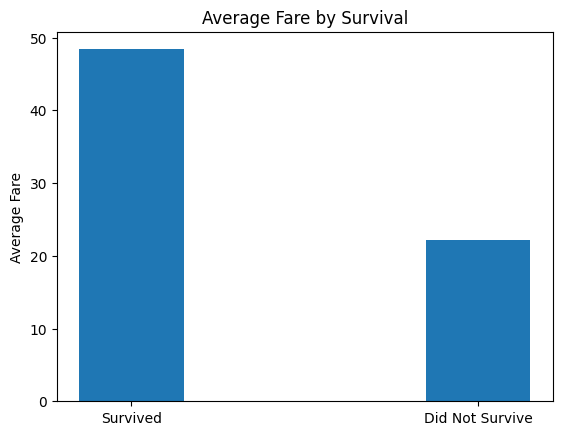

In [10]:
import matplotlib.pyplot as plt

def avg_fare_by_survival(df):
    survived_fare = df[df['Survived'] == 1]['Fare'].mean()
    not_survived_fare = df[df['Survived'] == 0]['Fare'].mean()
    
    _, b = plt.subplots()
    b.bar(['Survived', 'Did Not Survive'], [survived_fare, not_survived_fare], width=0.3)
    b.set_title('Average Fare by Survival')
    b.set_ylabel('Average Fare')
    plt.show()

avg_fare_by_survival(df)

the average fare paid by survivors is higher than the average fare paid by passengers who did not survive. This suggests that passengers who paid higher fares may have been given preferential treatment during the evacuation of the Titanic, which could have contributed to their higher survival rate. However, it's also possible that the higher fares paid by survivors are simply due to chance or other factors not related to their survival.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

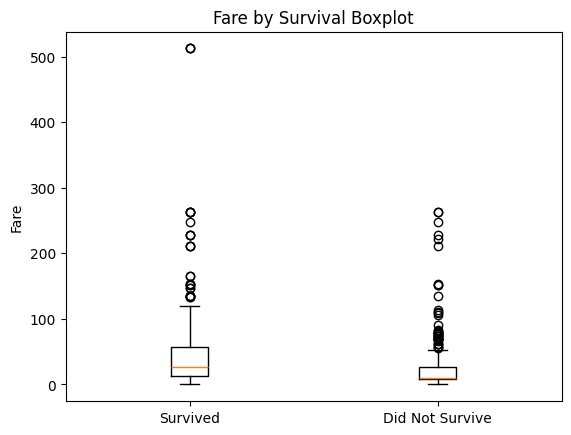

In [11]:
def fare_by_survival(df):
    fig, ax = plt.subplots()
    ax.boxplot([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']])
    ax.set_xticklabels(['Survived', 'Did Not Survive'])
    ax.set_title('Fare by Survival Boxplot')
    ax.set_ylabel('Fare')
    plt.show()

fare_by_survival(df)

We can see that the median fare paid by those who survived is slightly higher than the median fare paid by those who did not. The box for those who survived is also slightly larger, suggesting a wider range of fares paid. There are also some outliers in the fare paid by those who survived. Overall, the plot suggests that those who paid higher fares were more likely to survive the disaster.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [17]:
import numpy as np
def normalize_fare(df):
    mean_fare = np.mean(df['Fare'])
    std_dv = np.std(df['Fare'])

    if std_dv != 0:
        total = (df['Fare'] - mean_fare)/std_dv
    df['Fare'] = total
df = pd.read_csv("train.csv")
normalize_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [18]:
def drop_non_numeric_columns(df):
    return df.select_dtypes(include='number')

df_new = drop_non_numeric_columns(df)
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,-0.502445
1,2,1,1,38.0,1,0,0.786845
2,3,1,3,26.0,0,0,-0.488854
3,4,1,1,35.0,1,0,0.420730
4,5,0,3,35.0,0,0,-0.486337


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [19]:
import pandas as pd
import numpy as np

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def N_most_similar_pairs(df, N):
    numerical_df = drop_non_numeric_columns(df)

    num_passengers = numerical_df.shape[0]
    distances = []
    for i in range(num_passengers):
        for j in range(i + 1, num_passengers):
            dist = euclidean_distance(numerical_df.iloc[i], numerical_df.iloc[j])
            distances.append((i, j, dist))

    filtered_distances = [(i, j, dist) for i, j, dist in distances if dist > 0]

    sorted_distances = sorted(filtered_distances, key=lambda x: x[2])
    most_similar_pairs = sorted_distances[:N]

    passenger_names = list(df['Name'])
    similar_pairs_names = [(passenger_names[i], passenger_names[j]) for i, j, _ in most_similar_pairs]

    return similar_pairs_names

df = pd.read_csv('train.csv')
N = 3
similar_pairs = N_most_similar_pairs(df, N)
df.head()

print("The 3 most similar pairs of passengers are:")
for pair in similar_pairs:
    print(pair)

The 3 most similar pairs of passengers are:
('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron')
('Ali, Mr. William', 'Harmer, Mr. Abraham (David Lishin)')
('Leeni, Mr. Fahim ("Philip Zenni")', 'Ohman, Miss. Velin')


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


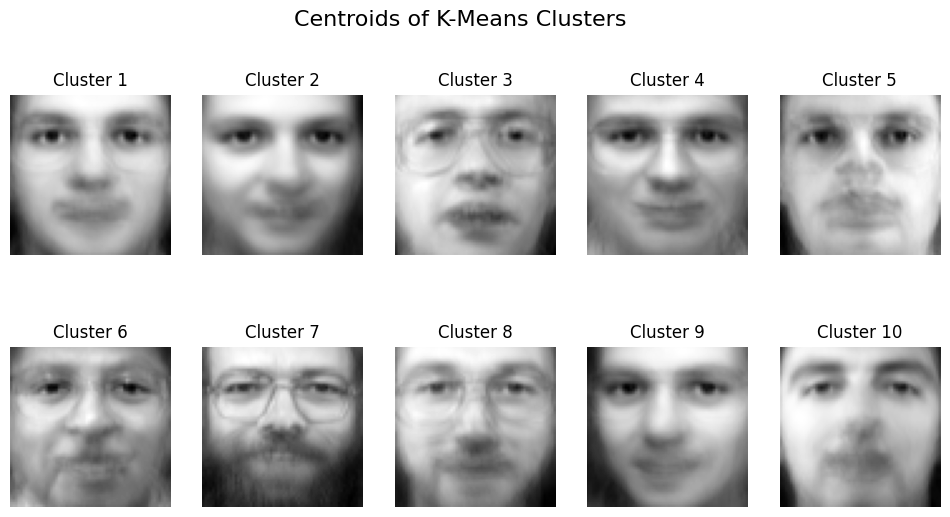

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans

olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)
data = olivetti.data
images = olivetti.images

num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Plot the centroids of each cluster
plt.figure(figsize=(12, 6))
for i in range(num_clusters):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i].reshape(64, 64), cmap='gray')
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')

plt.suptitle("Centroids of K-Means Clusters", fontsize=16)
plt.show()


#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits

mnist = load_digits()
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(mnist.data)

labels = mnist.target
kmeans_silhouette = silhouette_score(mnist.data, kmeans.labels_)
labels_silhouette = silhouette_score(mnist.data, labels)
print("KMeans Silhouette Score:", kmeans_silhouette)
print("Labels Silhouette Score:", labels_silhouette)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Silhouette Score: 0.18238453546718567
Labels Silhouette Score: 0.1629432052257522


-> we found out that the KMeans clustering had a slightly higher score. This implies that the clusters produced by KMeans were slightly better-defined, likely due to the algorithm's ability to capture subtle differences between the images that the labels may not account for.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

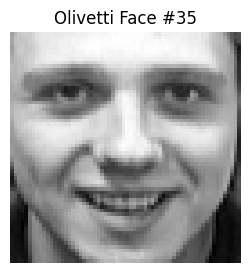

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)

data = olivetti.data
images = olivetti.images
targets = olivetti.target

random_index = np.random.randint(len(data))

plt.figure(figsize=(3, 3))
plt.imshow(images[random_index], cmap='gray')
plt.title(f"Olivetti Face #{random_index}")
plt.axis('off')
plt.show()


#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

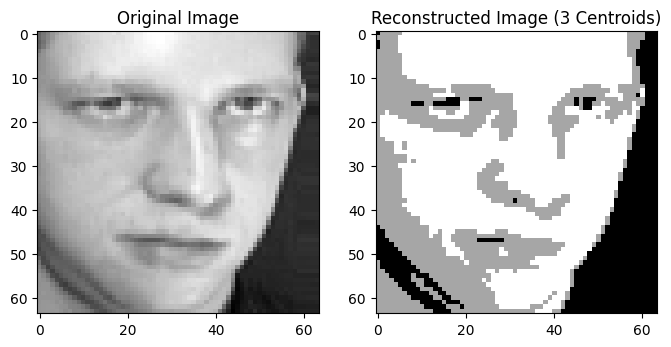

In [25]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


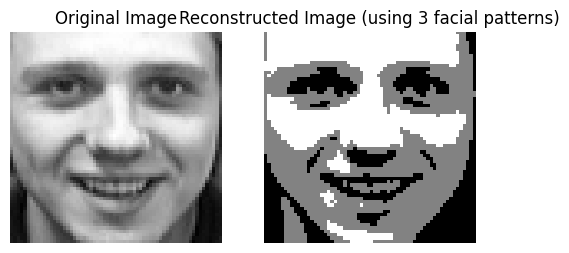

In [31]:
selected_image = data[random_index].reshape(64, 64) 

k = 3  
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(selected_image.reshape(-1, 1))  

reconstructed_image = kmeans.cluster_centers_[kmeans.labels_].reshape(64, 64)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(selected_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Reconstructed Image (using {k} facial patterns)")
plt.axis('off')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


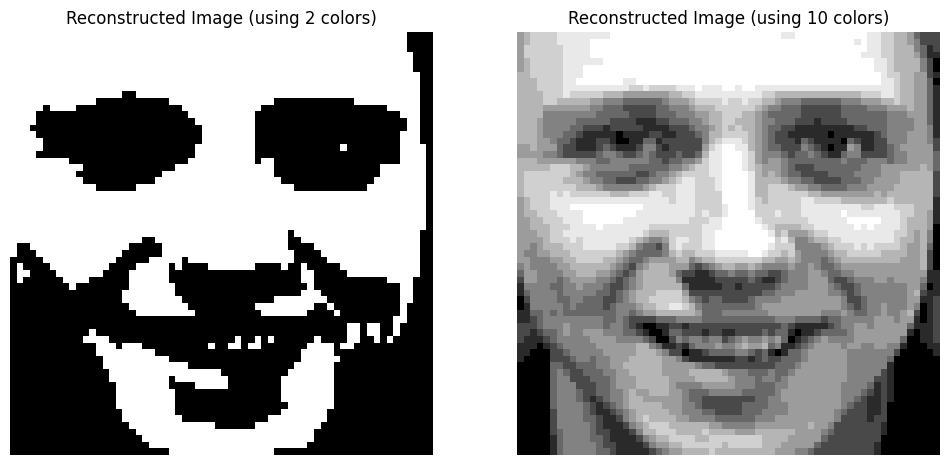

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans

def recolor_image(image, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(image.reshape(-1, 1))  

    reconstructed_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)

    return reconstructed_image

selected_image = data[random_index].reshape(64, 64)  

num_colors_list = [2, 10]

plt.figure(figsize=(12, 6))

for i, num_colors in enumerate(num_colors_list, start=1):
    reconstructed_image = recolor_image(selected_image, num_colors)

    plt.subplot(1, 2, i)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstructed Image (using {num_colors} colors)")
    plt.axis('off')

plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

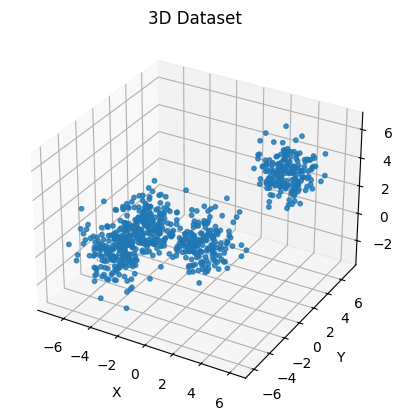

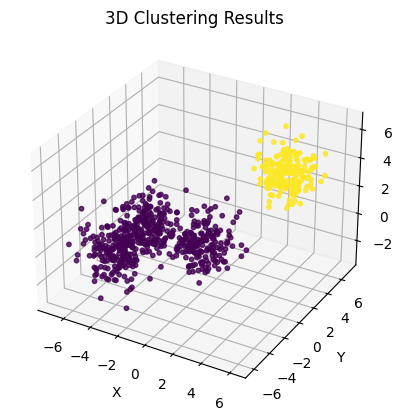

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

centers_3d = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
X_3d, _ = make_blobs(n_samples=750, centers=centers_3d, cluster_std=1.0, random_state=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=10, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Dataset')
plt.show()

class DBC_3D():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [0 for _ in range(len(self.dataset))]

    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])

    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if self.distance(i, j) <= self.epsilon and i != j:
                neighborhood.append(j)
        return neighborhood

    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts

    def assign(self, i, cluster_num):
        self.assignments[i] = cluster_num
        neighbor_queue = self.get_neighborhood(i)

        while neighbor_queue:
            next_candidate = neighbor_queue.pop()
            if self.assignments[next_candidate] != 0:
                continue

            self.assignments[next_candidate] = cluster_num

            if self.is_core(next_candidate):
                next_neighborhood = self.get_neighborhood(next_candidate)
                neighbor_queue += [i for i in next_neighborhood if self.assignments[i] == 0]

        return

    def dbscan(self):
        cluster_num = 1
        for i in range(len(self.dataset)):
            if self.is_core(i) and self.assignments[i] == 0:
                self.assign(i, cluster_num)
                cluster_num += 1

        return self.assignments

clustering_3d = DBC_3D(X_3d, 5, 2).dbscan()

# Plot the 3D clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=clustering_3d, s=10, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Clustering Results')
plt.show()
